# Why we conduct the reviews analysis 
As in the regression analysis, it is impossible for us to consider every element/independent variable, we want to use the reviews analysis as a way to know what are some subjective factors such as different people's taste from the people who went to the restaurant before. 

In [155]:
import pandas as pd
import json
import seaborn as sns

In [2]:
inputfile = open("yelp_academic_dataset_business.json","r")
with open('yelp_academic_dataset_business.json') as inputfile:
    business = pd.read_json(inputfile, lines = True)

In [3]:
austin_business = business.loc[business['city'].str.contains('Austin')]
#check for whether if the columns contain null value
austin_business = austin_business[austin_business['categories'].notna()]
austin_business['categories'].isnull().sum()

0

In [4]:
#filter the restaurants
austin_res = austin_business[austin_business['categories'].str.contains('Restaurants')]

In [5]:
austin_res.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
38,Xw8tuI30T-xihpzwBV-zJg,El Pollo Rey,1725 E Riverside Dr,Austin,TX,78741,30.243493,-97.730141,5.0,11,0,"{'RestaurantsGoodForGroups': 'True', 'Restaura...","Food Trucks, Restaurants, Specialty Food, Food...",None
41,NRPemqVb4qpWFF0Avq_6OQ,Eurasia Sushi Bar & Seafood,"7101 W Hwy 71, Ste C-13",Austin,TX,78735,30.234533,-97.877262,4.5,395,1,"{'Ambience': '{'touristy': False, 'hipster': F...","Bars, Nightlife, Cocktail Bars, Seafood, Resta...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-22:0', ..."
61,bRsDZ44CD3uhGnRY3NeQhQ,Wendy's,6247 Mcneil Drive,Austin,TX,78729,30.441875,-97.746581,2.0,46,1,"{'RestaurantsPriceRange2': '1', 'OutdoorSeatin...","Fast Food, Restaurants, Burgers","{'Monday': '6:30-1:0', 'Tuesday': '6:30-1:0', ..."
65,z-0oY7VxQMQw3JHvdPejrA,Olmecas Mexican Restaurant,2121 E Oltorf St,Austin,TX,78741,30.230016,-97.732639,3.0,21,0,"{'Ambience': '{'romantic': False, 'intimate': ...","Coffee & Tea, Tex-Mex, Restaurants, Mexican, Food","{'Monday': '7:0-23:30', 'Tuesday': '7:0-23:30'..."
108,qTdz29Nf3zoALiDDEKfWlw,Pho Oanh,"2121 E Oltorf St, Ste 12B",Austin,TX,78741,30.229913,-97.732649,3.5,15,0,"{'Ambience': '{'romantic': False, 'intimate': ...","Taiwanese, Vietnamese, Restaurants",None


In [6]:
#Our classfication for different cateogries
American = ['American', 'Burger', 'Pizza', 'Sandwiches', 'Salad', 'Hot Dogs', 'Chicken Wings']
Fast_food = ['Fast Food', 'Food Trucks', 'Food Stands']
Coffee_tea = ['Coffee & Tea', 'Cafe', 'Desserts', 'Bakeries', 'Ice Cream & Frozen Yogurt']
Mexican = ['Mexican', 'Tex-Mex', 'Tacos']
Bar = ['Bar', 'Cocktail Bars', 'Beer', 'Wine & Spirits']
#All the others, we set to the category of others

In [8]:
#set the categories into what we classify
austin_res.is_copy=True
#set the words have words classify as American
for element in American:
    austin_res.loc[austin_res['categories'].str.contains(element), 'categories'] = 'American'
#set words to Fast Food
for element in Fast_food:
    austin_res.loc[austin_res['categories'].str.contains(element), 'categories'] = 'Fast Food'
#set words to Coffee&tea
for element in Coffee_tea:
    austin_res.loc[austin_res['categories'].str.contains(element), 'categories'] = 'Coffee & Tea'
#set words to Mexican
for element in Mexican:
    austin_res.loc[austin_res['categories'].str.contains(element), 'categories'] = 'Mexican'
for element in Bar:
    austin_res.loc[austin_res['categories'].str.contains(element), 'categories'] = 'Bar'
#set words to Chinese
austin_res.loc[austin_res['categories'].str.contains('Chinese'), 'categories'] = 'Chinese'
#set words to Japanese
austin_res.loc[austin_res['categories'].str.contains('Japanese'), 'categories'] = 'Japanese'
austin_res.loc[austin_res['categories'].str.contains('Sushi Bars'), 'categories'] = 'Japanese'
#set words to Italian
austin_res.loc[austin_res['categories'].str.contains('Italian'), 'categories'] = 'Italian'
#set words to Thai
austin_res.loc[austin_res['categories'].str.contains('Thai'), 'categories'] = 'Thai'
austin_res.loc[austin_res['categories'].str.contains('Vietnamese'), 'categories'] = 'Thai'
#set words to Vegan
austin_res.loc[austin_res['categories'].str.contains('Vegetarian'), 'categories'] = 'Vegetarian'
austin_res.loc[austin_res['categories'].str.contains('Vegan'), 'categories'] = 'Vegetarian'
#set words to Brunch
austin_res.loc[austin_res['categories'].str.contains('Brunch'), 'categories'] = 'Brunch'

In [9]:
#set all the others to other
austin_res.loc[(austin_res['categories'] != 'Thai') & (austin_res['categories'] != 'Brunch')
          & (austin_res['categories'] != 'Chinese') & (austin_res['categories'] != 'American')
              &(austin_res['categories'] != 'Fast Food') & (austin_res['categories'] != 'Coffee & Tea')
              & (austin_res['categories'] != 'Bar') & (austin_res['categories'] != 'Japanese') 
              & (austin_res['categories'] != 'Italian') & (austin_res['categories'] != 'Mexican')
              & (austin_res['categories'] != 'Vegetarian'), 'categories'] = 'Other'

In [10]:
austin_res.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
38,Xw8tuI30T-xihpzwBV-zJg,El Pollo Rey,1725 E Riverside Dr,Austin,TX,78741,30.243493,-97.730141,5.0,11,0,"{'RestaurantsGoodForGroups': 'True', 'Restaura...",Fast Food,None
41,NRPemqVb4qpWFF0Avq_6OQ,Eurasia Sushi Bar & Seafood,"7101 W Hwy 71, Ste C-13",Austin,TX,78735,30.234533,-97.877262,4.5,395,1,"{'Ambience': '{'touristy': False, 'hipster': F...",Bar,"{'Monday': '0:0-0:0', 'Tuesday': '11:0-22:0', ..."
61,bRsDZ44CD3uhGnRY3NeQhQ,Wendy's,6247 Mcneil Drive,Austin,TX,78729,30.441875,-97.746581,2.0,46,1,"{'RestaurantsPriceRange2': '1', 'OutdoorSeatin...",American,"{'Monday': '6:30-1:0', 'Tuesday': '6:30-1:0', ..."
65,z-0oY7VxQMQw3JHvdPejrA,Olmecas Mexican Restaurant,2121 E Oltorf St,Austin,TX,78741,30.230016,-97.732639,3.0,21,0,"{'Ambience': '{'romantic': False, 'intimate': ...",Coffee & Tea,"{'Monday': '7:0-23:30', 'Tuesday': '7:0-23:30'..."
108,qTdz29Nf3zoALiDDEKfWlw,Pho Oanh,"2121 E Oltorf St, Ste 12B",Austin,TX,78741,30.229913,-97.732649,3.5,15,0,"{'Ambience': '{'romantic': False, 'intimate': ...",Thai,None


In [11]:
#check whether there is duplicate business id or not
austin_res.business_id.duplicated().sum()

0

Vegetarian food tend to have the higher score, while Chinese restaruant have lower score

Text(0, 0.5, 'Rating Stars')

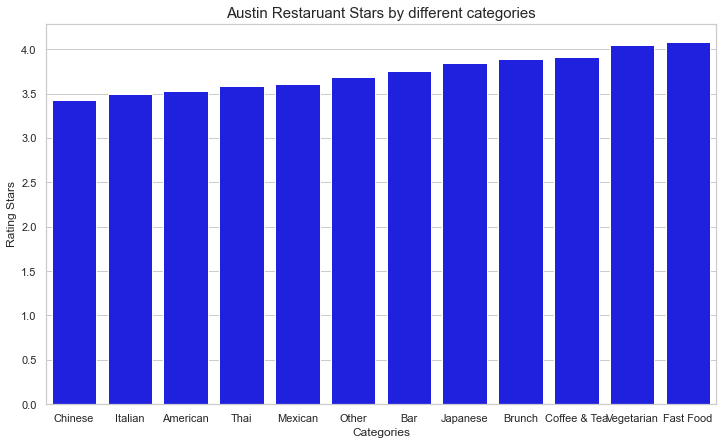

In [157]:
#view the average ratings for each category
import matplotlib.pyplot as plt
plt.figure(figsize=(12,7))
stars_result = austin_res.groupby('categories')['stars'].mean().reset_index().sort_values('stars')
sns.set(style="whitegrid", color_codes=True)
sns.barplot(x = 'categories', y = 'stars', data = austin_res, ci = None, order=stars_result['categories'], color = 'blue')
plt.title("Austin Restaruant Stars by different categories", size = 15)
plt.xlabel("Categories", size = 12)
plt.ylabel("Rating Stars", size = 12)

Text(0, 0.5, 'Restaurant name')

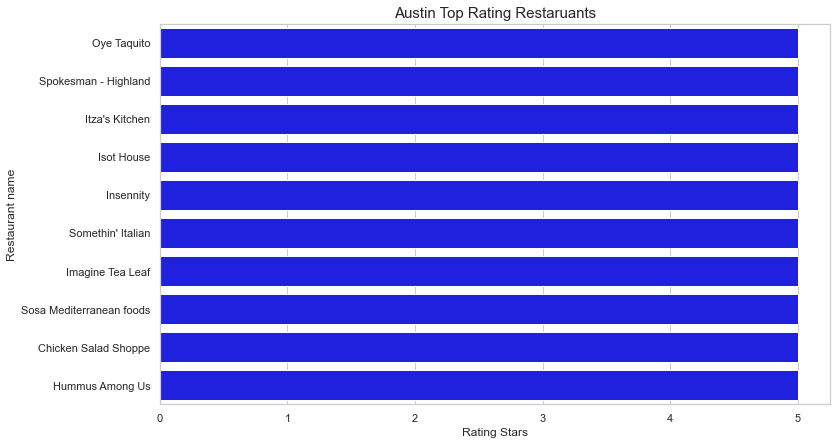

In [158]:
#see restaruants in Austin that from the highest to the lowest
plt.figure(figsize=(12,7))
rating_result = austin_res.groupby('name')['stars'].mean().reset_index().sort_values('stars', ascending = False)[:10]
sns.barplot(x = 'stars', y = 'name', data = austin_res, ci = None, order=rating_result['name'], color = 'blue')
plt.title("Austin Top Rating Restaruants", size = 15)
plt.xlabel("Rating Stars", size = 12)
plt.ylabel("Restaurant name", size = 12)

In [16]:
#see restaruants in Austin that from the highest to the lowest
austin_res.sort_values(['stars', 'review_count'], ascending=[False, False])[:10]

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
55090,Rba9Ol4jnTiov6_iAuoF5g,1618 Asian Fusion,1618 East Riverside Dr,Austin,TX,78741,30.245321,-97.730319,5.0,641,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsTab...",Coffee & Tea,"{'Monday': '0:0-0:0', 'Tuesday': '10:0-21:45',..."
102526,wB1qckz9iC0aq5XuWRmCIA,Jewboy Burgers,5111 Airport Blvd,Austin,TX,78751,30.312741,-97.715046,5.0,516,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...",American,"{'Monday': '0:0-0:0', 'Tuesday': '11:0-21:0', ..."
32771,puse310xumoKI0WMHNXnRA,T-Loc's Sonora Hot Dogs,5000 Burnet Rd,Austin,TX,78756,30.321169,-97.739506,5.0,410,1,"{'Caters': 'True', 'GoodForKids': 'True', 'Has...",American,"{'Tuesday': '17:30-20:0', 'Wednesday': '17:30-..."
102463,UsEa8RzT1Tue2GdveG2jZQ,Austin Eats Food Tours,,Austin,TX,78704,30.245673,-97.768836,5.0,308,1,"{'RestaurantsGoodForGroups': 'True', 'Restaura...",Other,"{'Monday': '9:0-18:0', 'Tuesday': '9:0-18:0', ..."
4402,5fI9ZzqzRLnMNYoTMjUGGQ,Granny's Tacos,1401 E 7th St,Austin,TX,78702,30.264266,-97.728159,5.0,306,1,"{'BikeParking': 'True', 'BusinessParking': '{'...",Fast Food,"{'Monday': '0:0-0:0', 'Tuesday': '8:0-15:0', '..."
118358,kqeblz37dvpiwy7-l9VfXA,Ceviche7,502 W 30th St,Austin,TX,78705,30.296361,-97.741437,5.0,267,1,"{'ByAppointmentOnly': 'False', 'RestaurantsGoo...",American,"{'Monday': '0:0-0:0', 'Tuesday': '18:0-23:0', ..."
88724,aC6Wjr8aLCYMsqrHpP_gPg,Kurry Takos,2730 E Cesar Chavez St,Austin,TX,78702,30.253308,-97.712918,5.0,249,0,"{'Alcohol': 'u'none'', 'NoiseLevel': 'u'averag...",Fast Food,{'Thursday': '17:0-22:0'}
49206,z6mbatIyCTaAxIvf_qzeIw,Texas Coffee Traders,1400 E 4th St,Austin,TX,78702,30.262073,-97.728643,5.0,248,1,"{'WiFi': 'u'no'', 'OutdoorSeating': 'True', 'B...",Coffee & Tea,"{'Monday': '8:0-16:0', 'Tuesday': '8:0-16:0', ..."
37975,QsMIiSFl8mmIQqvN3FtPoQ,Ng BMT,"8557 Research Blvd, Ste 200",Austin,TX,78758,30.411661,-97.675617,5.0,212,0,"{'RestaurantsPriceRange2': '1', 'RestaurantsGo...",American,"{'Monday': '16:30-21:0', 'Wednesday': '16:30-2..."
69717,MgIylzMhBjJ6XyGyz0iYFg,Van's Banh Mi,201 E 53rd St,Austin,TX,78751,30.317365,-97.721102,5.0,211,1,"{'RestaurantsDelivery': 'False', 'RestaurantsT...",American,"{'Monday': '0:0-0:0', 'Wednesday': '11:0-18:0'..."


In [17]:
#load the reviews data
import numpy as np
import pandas as pd
reviews = []
r_dtypes = {"stars": np.float16, 
            "useful": np.int32, 
            "funny": np.int32,
            "cool": np.int32,
           }
with open("yelp_academic_dataset_review.json", "r") as f:
    reader = pd.read_json(f, orient="records", lines=True, 
                          dtype=r_dtypes, chunksize=1000)
        
    for chunk in reader:
        reduced_chunk = chunk.drop(columns=['review_id', 'user_id'])\
                             .query("`date` >= '2017-12-01'")
        reviews.append(reduced_chunk)
    
reviews = pd.concat(reviews, ignore_index=True)

In [20]:
reviews.head()

,business_id,stars,useful,funny,cool,text,date
0,xGXzsc-hzam-VArK6eTvtw,1.0,2,0,0,"This place used to be a cool, chill place. Now...",2018-01-21 04:41:03
1,DbXHNl890xSXNiyRczLWAg,5.0,0,0,0,Probably one of the better breakfast sandwiche...,2017-12-02 18:16:13
2,KXCXaF5qimmtKKqnPc_LQA,1.0,0,0,0,Great coffee and pastries. Baristas are excell...,2018-03-03 23:45:25
3,vRrDTIW9IFBO4cc3laazUw,5.0,0,0,0,So sad to learn they are demolishing this. Alw...,2018-03-15 20:34:25
4,VPqWLp9kMiZEbctCebIZUA,3.0,0,0,0,"Overall is good, is worth the line up I don't ...",2018-09-25 03:22:50


In [21]:
reviews.isnull().sum()

business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64

In [22]:
#combine the reviews and the restaurant together, drop unnecessary values
austin_res_review = pd.merge(austin_res, reviews, on = 'business_id')
austin_res_review = austin_res_review.drop(columns=['latitude', 'longitude'])

In [23]:
austin_res_review.head()

,business_id,name,address,city,state,postal_code,stars_x,review_count,is_open,attributes,categories,hours,stars_y,useful,funny,cool,text,date
0,NRPemqVb4qpWFF0Avq_6OQ,Eurasia Sushi Bar & Seafood,"7101 W Hwy 71, Ste C-13",Austin,TX,78735,4.5,395,1,"{'Ambience': '{'touristy': False, 'hipster': F...",Bar,"{'Monday': '0:0-0:0', 'Tuesday': '11:0-22:0', ...",5.0,0,0,0,"Don't change a thing, Eurasia!! This place has...",2018-10-04 16:09:21
1,NRPemqVb4qpWFF0Avq_6OQ,Eurasia Sushi Bar & Seafood,"7101 W Hwy 71, Ste C-13",Austin,TX,78735,4.5,395,1,"{'Ambience': '{'touristy': False, 'hipster': F...",Bar,"{'Monday': '0:0-0:0', 'Tuesday': '11:0-22:0', ...",4.0,1,1,1,We came on an off hour so it would hard to jud...,2018-03-15 21:44:28
2,NRPemqVb4qpWFF0Avq_6OQ,Eurasia Sushi Bar & Seafood,"7101 W Hwy 71, Ste C-13",Austin,TX,78735,4.5,395,1,"{'Ambience': '{'touristy': False, 'hipster': F...",Bar,"{'Monday': '0:0-0:0', 'Tuesday': '11:0-22:0', ...",5.0,2,0,0,This place is totally delicious and reasonably...,2017-12-29 23:21:24
3,NRPemqVb4qpWFF0Avq_6OQ,Eurasia Sushi Bar & Seafood,"7101 W Hwy 71, Ste C-13",Austin,TX,78735,4.5,395,1,"{'Ambience': '{'touristy': False, 'hipster': F...",Bar,"{'Monday': '0:0-0:0', 'Tuesday': '11:0-22:0', ...",1.0,0,0,0,My husband and I came opening weekend and love...,2018-02-24 14:24:35
4,NRPemqVb4qpWFF0Avq_6OQ,Eurasia Sushi Bar & Seafood,"7101 W Hwy 71, Ste C-13",Austin,TX,78735,4.5,395,1,"{'Ambience': '{'touristy': False, 'hipster': F...",Bar,"{'Monday': '0:0-0:0', 'Tuesday': '11:0-22:0', ...",5.0,1,1,0,I just moved to Austin from Southern Californi...,2018-06-19 22:09:07


In [24]:
austin_res_review.isnull().sum()

business_id        0
name               0
address            0
city               0
state              0
postal_code        0
stars_x            0
review_count       0
is_open            0
attributes       447
categories         0
hours           3339
stars_y            0
useful             0
funny              0
cool               0
text               0
date               0
dtype: int64

In [162]:
#see how many restaruants are closed and open
austin_res_review['is_open'].value_counts()

1    180192
0     19175
Name: is_open, dtype: int64

In [28]:
#labels the ratings to positive and negative
austin_res_review['sentiment'] = None
#rename the stars from business and review dataset
austin_res_review = austin_res_review.rename(columns = {"stars_x":"rating"})
austin_res_review = austin_res_review.rename(columns = {"stars_y":"each_review_rating"})
austin_res_review.loc[austin_res_review["each_review_rating"] >=4, 'sentiment'] = 'positive'
austin_res_review.loc[austin_res_review["each_review_rating"] <3, 'sentiment'] = 'negative'

Text(0.5, 1.0, 'Ratings Distribution')

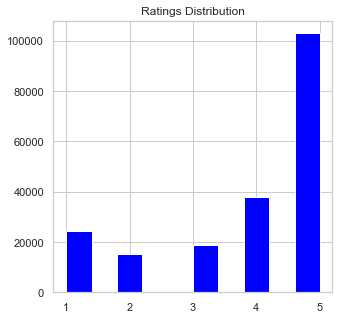

In [160]:
#see the ratings distribution
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.hist(austin_res_review['each_review_rating'], color = 'blue');
plt.title("Ratings Distribution")

# How we analyze the positive and negative words in text
Firstly, we lower the text and remove the punctuations. Then we manually remove some unnecessary or meaningless words that appears very frequent in both positive and negative comments. Finally, we use the common positive and negative words from Internet to filter out all the positive and negative words for frequency, polarity, and subjectivity analysis. 

In [177]:
#remove punctuations, and remove common stop words
from sklearn.feature_extraction import text
stop_words = text.ENGLISH_STOP_WORDS
austin_res_review.loc[:,'lower_text'] = austin_res_review.loc[:,'text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
austin_res_review.loc[:,'text_nonpuc'] = austin_res_review.loc[:,'lower_text'].str.replace('[^\w\s]', '', regex = True)
austin_res_review.loc[:,'clean_text'] = austin_res_review.loc[:,'text_nonpuc'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))

In [178]:
#count how many words appear in the text
austin_res_review.loc[:,'num_words'] = austin_res_review.loc[:,'clean_text'].apply(lambda x: len(str(x).split(" ")))

In [179]:
#count the average num of words in positive and negative comments
austin_res_review.loc[austin_res_review['sentiment'] == 'positive', 'num_words'].mean()

42.102825952362316

In [180]:
austin_res_review.loc[austin_res_review['sentiment'] == 'negative', 'num_words'].mean()

54.97682642389587

<AxesSubplot:xlabel='sentiment', ylabel='num_words'>

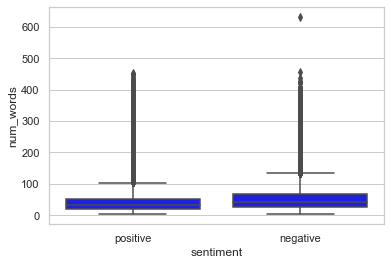

In [181]:
sns.boxplot(x='sentiment', y='num_words', color = 'blue', data=austin_res_review)
#On average, negative comments seem longer than positive comments

In [182]:
#see some other common words that appears besides the stop words, without any bias of positive or negative
from collections import Counter
count_common_words = Counter(" ".join(austin_res_review['clean_text']).split()).most_common(50)

In [183]:
other_stop_words = ['food', 'place', 'service', 'just', 'like', 'time', 'really', 'austin', 'ordered', 'got', 'restaurant', 
                   'ive', 'im', 'definitely', 'try', 'came', 'menu', 'staff', 'wait', 'didnt', 'experience',
                   'tacos', 'went', 'pizza', 'cheese', 'super', 'make', 'bar', 'drinks', 'order', 'chicken',
                   'dont', 'little', 'sauce', 'did', 'fresh', 'people', 'come', 'spot', 'fried', 'lunch', 
                   'right', 'flavor', 'minutes', 'said', 'asked','table', 'told', 'took', 'going',
                   'manager', 'know', '2', 'location', 'times', 'server', 'left', 'meal', 'wasnt',
                   'customer', 'say', 'wanted', 'want', 'pretty', 'drink', 'hour', 'sure', 'waitress', 'ask', 
                   'night', '3', 'meat', 'taste', 'night', 'think', 'waiting', 'money', 'waiter', 'work']
meaningless_words = ['great', 'good', 'better', 'amazing', 'best', 'fine', 'right', 'well', 'sorry', 'terrible',
                    'unfortunately', 'favorite', 'excited', 'loved', 'happy', 'awesome', 'perfect', 'love',
                    'bad', 'perfectly', 'hot', 'enjoyed', 'nice', 'worth', 'ready', 'recommend', 'disappointed']
austin_res_review.loc[:,'further_clean_text'] = austin_res_review.loc[:,'clean_text'].apply(lambda x: " ".join(x for x in x.split() if x not in other_stop_words))
austin_res_review.loc[:,'manual_clean_text'] = austin_res_review.loc[:,'further_clean_text'].apply(lambda x: " ".join(x for x in x.split() if x not in meaningless_words))

In [102]:
#import poisitve and negative words as list, only filter the sentiment words
import csv
positive = open('positive-words.txt', 'r')
positive_lists = [(line.strip()).split() for line in positive]
positive_word = []
for element in positive_lists[36:]:
    positive_word.append(element[0])
positive = open('positive-words.txt', 'r')
negative = open('negative-words.txt', 'r', encoding="ISO-8859-1")
negative_lists = [(line.strip()).split() for line in negative]
negative_word = []
for element in negative_lists[37:]:
    negative_word.append(element[0])
sentiment_words = positive_word + negative_word

In [184]:
austin_res_review.loc[:,'final_clean_text'] = austin_res_review.loc[:,'manual_clean_text'].apply(lambda x: " ".join(x for x in x.split() if x in sentiment_words))       

# 到这里data cleaning结束 ：）

In [104]:
#caculate the polarity
from textblob import TextBlob

In [185]:
austin_res_review.loc[:,'polarity'] = austin_res_review.loc[:,'final_clean_text'].apply(lambda x: TextBlob(x).sentiment)

In [186]:
sentiment_series = austin_res_review['polarity'].tolist()
austin_res_review[['polarity','subjectivity']]=pd.DataFrame(sentiment_series,
       index=austin_res_review.index)

In [187]:
#delete if the final clean text is None
austin_res_review = austin_res_review.loc[(austin_res_review['polarity'] != 0) & 
                                          (austin_res_review['subjectivity'] != 0)]

In [188]:
analysis_austin_df = austin_res_review[['name', 'categories','rating', 'each_review_rating', 'review_count',
                                        'sentiment', 'each_review_rating',
                                        'subjectivity', 'polarity', 'final_clean_text']]

In [225]:
#find the most frequent positive words in a category
def find_most_frequent_positive(category):
    category_data = analysis_austin_df.loc[analysis_austin_df.categories == category]
    frequency_count = Counter(" ".join(category_data.loc[category_data.sentiment == 'positive', 'final_clean_text'])
        .split()).most_common(15)
    return frequency_count

In [226]:
def positive_word_dataframe(category):
    positive_df = pd.DataFrame(find_most_frequent_positive(category), columns=['word', 'frequency'])
    return positive_df

In [265]:
def find_polarity_subjectivity_pos(category):
    frequency_lst = []
    for element in find_most_frequent_positive(category):
        frequency_lst.append(element[0])
    category_data = analysis_austin_df.loc[analysis_austin_df.categories == category]
    positive_data = category_data.loc[category_data.sentiment == 'positive']
    pol_sub_data = positive_data[['subjectivity', 'polarity', 'final_clean_text']]
    for element in frequency_lst:
        contains_pol_sub = pol_sub_data.loc[pol_sub_data['final_clean_text'].str.contains(element)]
    polarity = contains_pol_sub['polarity'].mean()
    subjectivity = contains_pol_sub['subjectivity'].mean()
    return polarity, subjectivity

In [266]:
def find_polarity_subjectivity_neg(category):
    frequency_lst = []
    for element in find_most_frequent_positive(category):
        frequency_lst.append(element[0])
    category_data = analysis_austin_df.loc[analysis_austin_df.categories == category]
    positive_data = category_data.loc[category_data.sentiment == 'negative']
    pol_sub_data = positive_data[['subjectivity', 'polarity', 'final_clean_text']]
    for element in frequency_lst:
        contains_pol_sub = pol_sub_data.loc[pol_sub_data['final_clean_text'].str.contains(element)]
    polarity = contains_pol_sub['polarity'].mean()
    subjectivity = contains_pol_sub['subjectivity'].mean()
    return polarity, subjectivity

In [267]:
def find_most_frequent_negative(category):
    category_data = analysis_austin_df.loc[analysis_austin_df.categories == category]
    neg_frequency_count = Counter(" ".join(category_data.loc[category_data.sentiment == 'negative', 'final_clean_text'])
        .split()).most_common(15)
    return neg_frequency_count

In [279]:
def negative_word_dataframe(category):
    negative_df = pd.DataFrame(find_most_frequent_negative(category), columns=['word', 'frequency'])
    return negative_df

In [249]:
def draw_word_cloud_pos(category):
    text = " ".join(word for word in positive_word_dataframe(category).word)
    wc = WordCloud(background_color="white", max_words=1000,
                contour_width=3, contour_color='firebrick')
    return wc.generate(text)

In [252]:
def draw_word_cloud_neg(category):
    text = " ".join(word for word in negative_word_dataframe(category).word)
    wc = WordCloud(background_color="white", max_words=1000,
                contour_width=3, contour_color='firebrick')
    return wc.generate(text)

# American

In [197]:
american = positive_word_dataframe('American')

Text(0.5, 1.0, 'American Restaurant TOP 15 Positive Words')

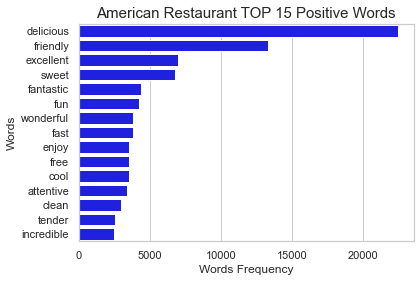

In [230]:
sns.barplot(x = 'frequency', y = 'word', data = american, color = 'blue')
plt.xlabel('Words Frequency', size=12)
plt.ylabel('Words', fontsize=12)
plt.title('American Restaurant TOP 15 Positive Words', size=15)

In [268]:
find_polarity_subjectivity_pos('American')

(0.6161789013984452, 0.8220069276271674)

In [143]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [250]:
#show the American wordcloud
american_wc = draw_word_cloud_pos('American')

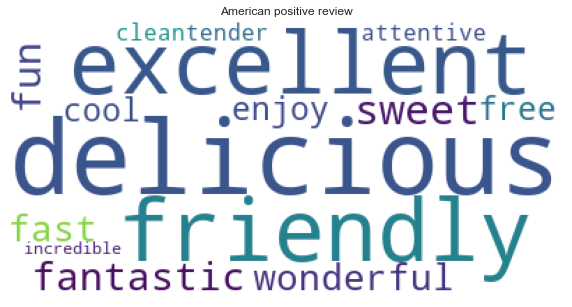

In [251]:
plt.figure(figsize=[10,10])
plt.imshow(american_wc)
plt.axis("off")
plt.title('American positive review')
plt.show()

In [280]:
american_neg = negative_word_dataframe('American')

In [286]:
find_polarity_subjectivity_neg('American')

(0.21944755448475692, 0.7699492157974299)

Text(0.5, 1.0, 'American Restaurant TOP 15 Negative Words')

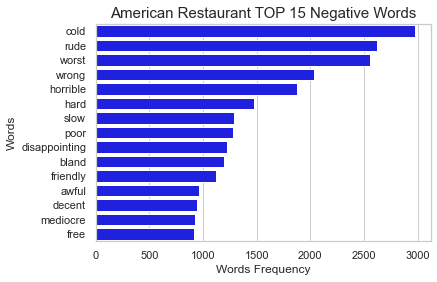

In [281]:
sns.barplot(x = 'frequency', y = 'word', data = american_neg, color = 'blue')
plt.xlabel('Words Frequency', size=12)
plt.ylabel('Words', fontsize=12)
plt.title('American Restaurant TOP 15 Negative Words', size=15)

In [284]:
american_wc_neg = draw_word_cloud_neg('American')

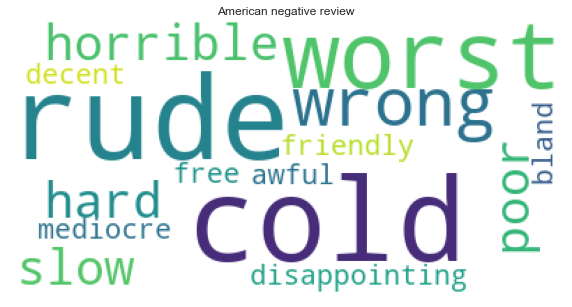

In [285]:
plt.figure(figsize=[10,10])
plt.imshow(american_wc_neg)
plt.axis("off")
plt.title('American negative review')
plt.show()

# Fastfood

In [271]:
fast_food = positive_word_dataframe('Fast Food')

Text(0.5, 1.0, 'Fast Food TOP 15 Positive Words')

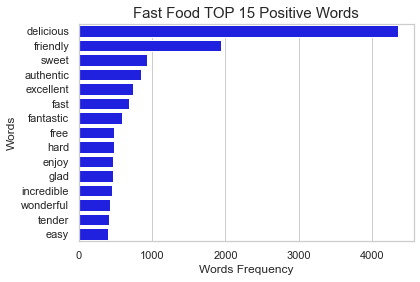

In [288]:
sns.barplot(x = 'frequency', y = 'word', data = fast_food, color = 'blue')
plt.xlabel('Words Frequency', size=12)
plt.ylabel('Words', fontsize=12)
plt.title('Fast Food TOP 15 Positive Words', size=15)

In [273]:
find_polarity_subjectivity_pos('Fast Food')

(0.3813925020849116, 0.7539003360451495)

In [276]:
fast_wc = draw_word_cloud_pos('Fast Food')

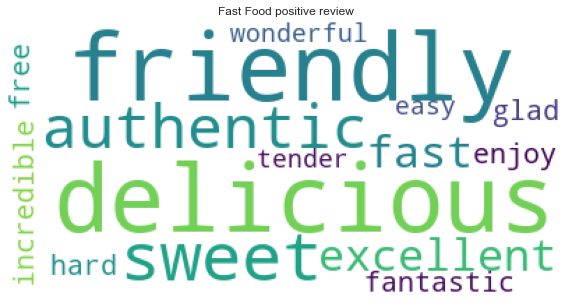

In [277]:
plt.figure(figsize=[10,10])
plt.imshow(fast_wc)
plt.axis("off")
plt.title('Fast Food positive review')
plt.show()

In [290]:
fastfood_neg = negative_word_dataframe('Fast Food')

In [291]:
find_polarity_subjectivity_neg('Fast Food')

(-0.07457855553837697, 0.6857952970750589)

Text(0.5, 1.0, 'American Restaurant TOP 15 Negative Words')

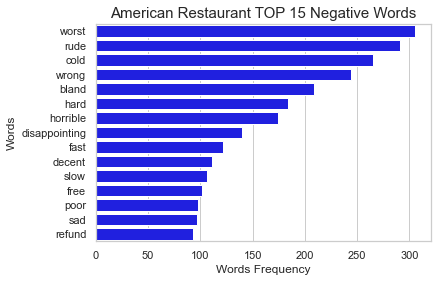

In [292]:
sns.barplot(x = 'frequency', y = 'word', data = fastfood_neg, color = 'blue')
plt.xlabel('Words Frequency', size=12)
plt.ylabel('Words', fontsize=12)
plt.title('American Restaurant TOP 15 Negative Words', size=15)

In [294]:
fastfood_wc_neg = draw_word_cloud_neg('American')

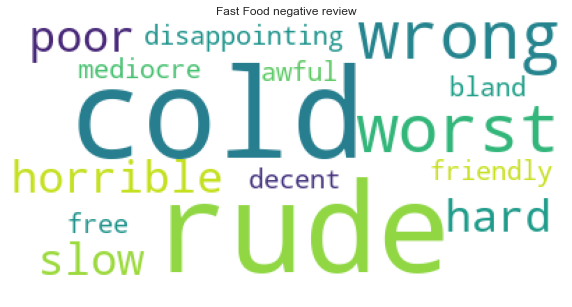

In [295]:
plt.figure(figsize=[10,10])
plt.imshow(fastfood_wc_neg)
plt.axis("off")
plt.title('Fast Food negative review')
plt.show()

# Coffee & Tea

In [296]:
coffee_tea = positive_word_dataframe('Coffee & Tea')

Text(0.5, 1.0, 'Coffee Tea TOP 15 Positive Words')

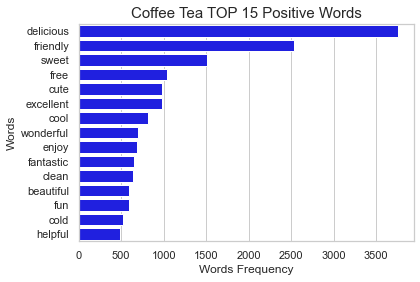

In [297]:
sns.barplot(x = 'frequency', y = 'word', data = coffee_tea, color = 'blue')
plt.xlabel('Words Frequency', size=12)
plt.ylabel('Words', fontsize=12)
plt.title('Coffee Tea TOP 15 Positive Words', size=15)

In [298]:
find_polarity_subjectivity_pos('Coffee & Tea')

(0.42343627293837943, 0.7189618422082706)

In [299]:
coffeetea_wc = draw_word_cloud_pos('Coffee & Tea')

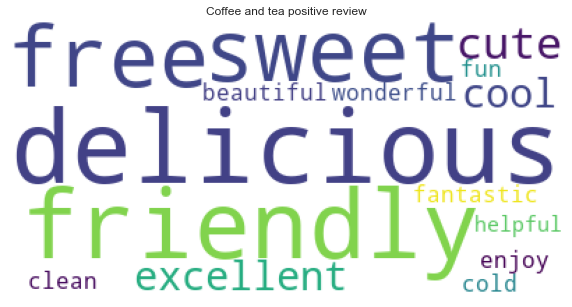

In [300]:
plt.figure(figsize=[10,10])
plt.imshow(coffeetea_wc)
plt.axis("off")
plt.title('Coffee and tea positive review')
plt.show()